In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
df = pd.read_csv("house_prices.csv")
df

,area,price
0,50,300000
1,100,600000
2,150,900000
3,200,1200000
4,250,1500000


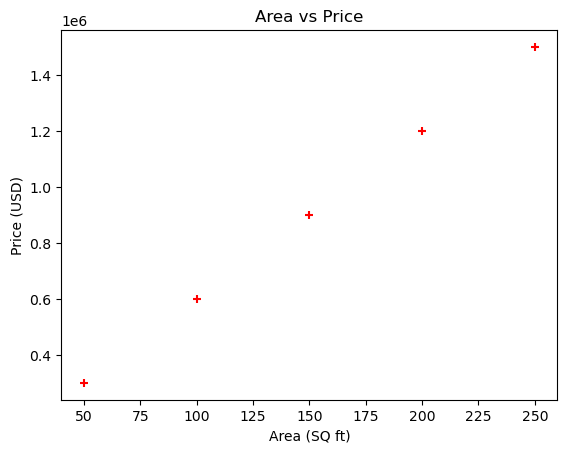

In [8]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel('Area (SQ ft)')
plt.ylabel('Price (USD)')
plt.title('Area vs Price')
plt.show()

In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
reg.predict(3300)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=3300.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.